# Projet Manipulation Image

## Partie 1: Valeurs de couleur

In [169]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.image as mpimg

In [227]:
## Creer votre propre Type de données abstrait Couleur sous python avec les caractériistiques suivants:
class Couleur:
    '''
    Constructeur à 3 paramétres qui represente les valeurs entiéres des différentes couleurs
    '''
    def __init__(self, R, G, B, name = None):
       #Mettre R, G ou B à 255 si celles-ci sont supérieures à 255
        if(R>255):  
            R=255
        if(G>255):
            G=255
        if(B>255):
            B=255
        self.R = int(R)
        self.G = int(G)
        self.B = int(B)
            
        
    '''
    Creer une couleur à partir d'une liste
    '''
    @staticmethod
    def creerCouleur(listeRGB):
        
        #Générer et retourner une couleur à partir de listeRGB 
        
        return Couleur(random.choice(listeRGB), random.choice(listeRGB), random.choice(listeRGB))
        
    '''
    Recupération de l'intensite de la couleur rouge
    '''
    def getR(self):
        return self.R
    '''
    Recupération de l'intensite de la couleur verte
    '''
    def getG(self):
        return self.G
    '''
    Recupération de l'intensite de la couleur verte
    '''
    def getB(self):
        return self.B
    '''
    Version brillante de cet objet couleur
    Il faut caculer le meme pourcentage de R,G,B
    Ajouter ces valeurs aux valeurs R,G,B de l'objet couleur originel
    Retourne un objet couleur
    '''
    def brighter(self,pourcentage):
        #Pourcentage des valeurs R, G, B de l'objet
        Rpourcentage = self.getR() * pourcentage
        Gpourcentage = self.getG() * pourcentage
        Bpourcentage = self.getB() * pourcentage
    
        #Valeurs de la version brillante de l'objet
        brighterRed = self.getR() + Rpourcentage
        brighterGreen = self.getG() + Gpourcentage
        brighterBlue = self.getB() + Bpourcentage
        
        return Couleur( int(brighterRed), int(brighterGreen), int(brighterBlue))
    '''
    Version sombre de cet objet couleur
    
    Il suffit de multiplier toutes les composantes R, G, B par le pourcentage passé en paramétre
    
    https://graphicdesign.stackexchange.com/questions/75417/how-to-make-a-given-color-a-bit-darker-or-lighter
    
    Retourne un objet couleur
    '''
    def darker(self,pourcentage):
        
        #Valeurs de la version sombre de l'objet
        darkerRed = self.getR() * pourcentage
        darkerGreen = self.getG() * pourcentage
        darkerBlue = self.getB() * pourcentage
        
        return Couleur(int(darkerRed), int(darkerGreen), int(darkerBlue))
        
    '''
    Chaine de caractére representant cet objet couleur
    Retourne un string contenant les valeurs des composantes R,G,B
    '''
    def toString(self):
        couleur = "R" + str(self.getR()) + " G" + str(self.getG()) + " B" + str(self.getB())
        return couleur 
    '''
    Comparaison de cet objet couleur avec color
    Retourne un booloean
    '''
    def equals(self,color):
        return self.getR() == color.getR() and self.getG() == color.getG() and self.getB() == color.getB()
    '''
     Calcul de la Luminance. La qualité des 
     images dans les écrans plasmas modernes est une combinaison linéaire des trois couleurs et est définie par
     l'equation Y = 0.299r + 0.587g + 0.114b
     
    '''
    def luminance(self):
        Y = (0.299*self.getR()) + (0.587*self.getG()) + (0.114*self.getB())
        return int(Y)
    '''
     Calcul du niveau de gris. Il faut remplacer chaque intensité de couleur par la valeur entiére de la luminance.
     Il faudra créer une nouvelle couleur avec des intensités égales à la luminance
    '''
    def grayScale(self):
        self.R = self.luminance()
        self.G = self.luminance()
        self.B = self.luminance()
    '''
     Compatibilité deux couleurs. Deux couleurs sont compatibles si la différence de leur luminance fait au moins 128
     Retourne un boolean qui vaut true si les deux couleurs sont compatibles et false sinon
    '''
    def compatible(self, couleur):
        diff = self.luminance() - couleur.luminance()
        if(diff >= 128):
            return True
        return False
    '''
     Addition de couleur
    '''
    def add(self, col):
        return Couleur(self.getR()+col.getR(), self.getG()+col.getG(), self.getB()+col.getB())
    '''
    Fonction permettant d'afficher une couleur dans un cercle. Vous pouvez l'utiliser.
    '''
    def showColor(self):
        fig, ax = plt.subplots()
        # create a grid to plot the color
        grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T
        # add a circle
        circle = mpatches.Circle(grid[0], 0.05, ec="none",color=(self.R/255,self.G/255,self.B/255))
        ax.add_patch(circle)
        #ax.add_line(line)

        plt.axis('equal')
        plt.axis('off')
        plt.tight_layout()
    
        plt.show()

        
    

Couleur créée 
R205 G84 B122
comparaison de l'image avec Couleur(0,123,130) =  False


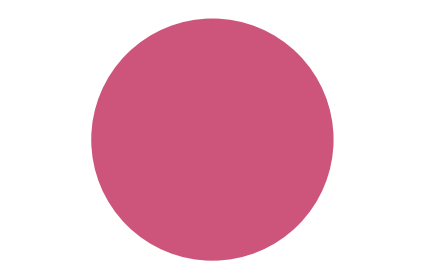

Version brillante
R255 G126 B183


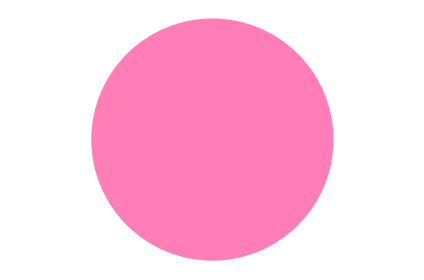

Version sombre
R102 G42 B61


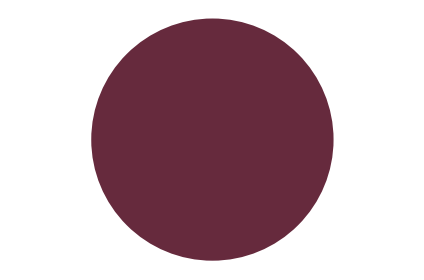

Version grisée
R124 G100 B109


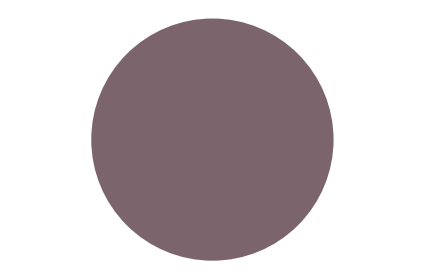

In [243]:
#creer un objet couleur
c = Couleur(0, 123, 130)

#créer un objet couleur à partir d'une liste
liste = range(255)          
created = Couleur.creerCouleur(liste)

print("Couleur créée ")
print(created.toString()) 

#comparer la couleur générée c
print("comparaison de l'image avec Couleur(0,123,130) = ", c.equals(created))
              
#Affichage de la couleur générée
created.showColor()

print("Version brillante")
print(created.brighter(0.5).toString())
created.brighter(0.5).showColor()

print("Version sombre")
print(created.darker(0.5).toString())
created.darker(0.5).showColor()

created.grayScale()
print("Version grisée")
print(created.toString())
created.showColor()


## Partie 2: Traitement d'image

In [220]:
## Image Processing
class Picture:
    '''
    Creer une image à partir d'un fichier en utilisant la fonction imread() de matplotlig.image ou plus généralement la 
    librairie Pillow
    '''
    def __init__(self, nomFichier = None, H = None, W = None):
        if nomFichier == None:
                
            '''
            Creer une image blanche de hauteur H et de largeur W
            '''
            self.H = H
            self.W = W
            self.img = np.zeros((H,W,3), dtype=np.uint8)     #définir l'image par défaut sous 8 bits
            
        else:
                
            '''
            Creer une image à partir d'un fichier
            '''
            
            self.img = mpimg.imread(nomFichier)
            self.img = self.img[:,:,:3].copy()                 #définir une image à 3 plans au lieu de 4
            self.img = (self.img * 255).astype(np.uint8)       #définir le type de l'image en 8 bits
            self.H = self.img.shape[1]
            self.W = self.img.shape[0]
            
    
    '''
    Retourne la hauteur H
    '''
    def getH(self):
        return self.H
    '''
    Retourne la largeur W
    '''
    def getW(self):
        return self.W
    '''
    Retourne le tableau numpy constituant l'image
    '''
    def getImg(self):
        return self.img
    '''
    Retourne les couleurs R,G, B sous forme de liste du pixel à la ligne row et la colonne col
    '''
    def getCouleur(self,row, col):
        listeRGB = self.getImg()[row, col]
        return Couleur(listeRGB[0], listeRGB[1], listeRGB[2])
         
    '''
    Modifie les couleurs R,G,B du pixel à la ligne row et la colonne col
    '''
    def setCouleur(self, row, col, couleur):
       
        liste = [couleur.R, couleur.G, couleur.B]
        self.img[row, col] = liste
        
        
    '''
    Affiche une image
    '''
    def affiche(self):
        
        plt.axis('off')
        plt.imshow(self.img)
        plt.show()
        
    '''
    Sauve  une image dans un fichier png
    '''
    def save(self, nomFichier):
        
        plt.imsave(nomFichier, self.img, format = "png")
    
    
    
    

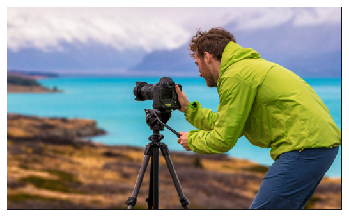

Les dimensions de l'image
Hauteur =  524
Largeur =  318
Les valeurs du pixel (150, 200)
[ 79 182 206]
La couleur du pixel (150, 200)


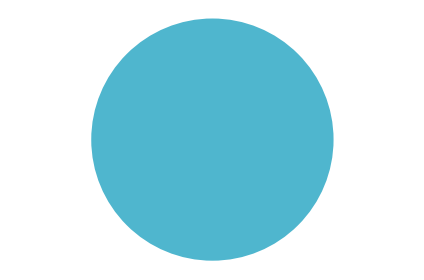

Modifier la couleur en Couleur(150, 10, 100)
les valeurs du pixel après modification
[150  10 100]
R150 G10 B100
la nouvelle couleur du pixel


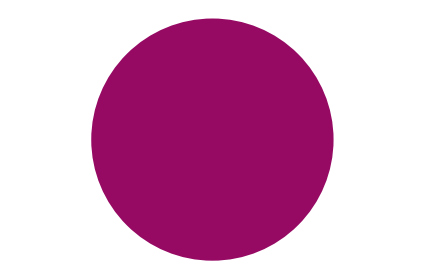

In [221]:
#Créer une image à partir d'un fichier
pic = Picture("capture.png")
pic.affiche()

#Afficher les dimensions de l'image
print("Les dimensions de l'image")
print("Hauteur = ", pic.getH())
print("Largeur = ", pic.getW())

#Afficher les valeurs du pixel
print("Les valeurs du pixel (150, 200)")
print(pic.getImg()[150,200]) 

#Afficher la couleur du pixel
print("La couleur du pixel (150, 200)")
couleur = pic.getCouleur(150,200)
couleur.showColor()

#Modification de la couleur du pixel
c = Couleur(150,10,100)
print("Modifier la couleur en Couleur(150, 10, 100)")
pic.setCouleur(150, 200, c)

#Afficher les valeurs du pixel après modification
print("les valeurs du pixel après modification")
print(pic.getImg()[150,200]) 
modifier = pic.getCouleur(150,200)
print(modifier.toString())
print("la nouvelle couleur du pixel")
modifier.showColor()


## Partie 3: Image Processing

In [222]:
## Image processing
class ImageProcessing:
    
    def __init__(self,image):
        self.image = image
    '''
    Helper function
    '''
    def __calGray__(listePixel):
        A = math.floor(0.299*listePixel[0] + 0.587*listePixel[1] + 0.114*listePixel[2])
        return np.ndarray([A,A,A])
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Appliquer les fonctions map, reduce ou filter pour reduire la complexite
    '''
    def transformGrayscaleMap(self):
        grayPicture = Picture(None,self.image.W,self.image.H)
        grayPicture.image = map(self.__calGray__,self.image.img[:,:])
        grayPicture.affiche()
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Une classe gloutonne avec des boucles for
    '''
    def transformGrayscaleGlouton(self):
        pic = self.image      
        width = pic.getW()
        height = pic.getH()
        
        #créer une image vide pour contenir l'image grayscale 
        gris = Picture(None, width, height)
        
        for col in range(width):
            for row in range(height):
                color = pic.getCouleur(col, row)
                color.grayScale()
                gris.setCouleur(col, row, color)
                
        #Définir une figure pour afficher l'image et sa transformée
        fig = plt.figure(figsize=(10, 10), frameon=False)
        plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=.05, wspace=.05)
        
        plt.subplot(1, 2, 1)
        plt.axis('off')
        plt.imshow(pic.img)
        plt.title("Image original")
        
        plt.subplot(1, 2, 2)
        plt.axis('off')
        plt.imshow(gris.img)
        plt.title("Image grayscale")
        
        plt.show()
        
            
        
    '''
     Creer une image en inversant les proportions de l'image source. Afficher les deux images
    '''
    def transformScale(self):
        
        source = self.image
        width  = source.getH()
        height = source.getW()
        
        renverser = Picture(None, width, height)

        for renverserCol in range(width):
            for renverserRow in range(height):
                sourceCol = renverserCol * height  / width
                sourceRow = renverserRow * width / height
                color = source.getCouleur(int(sourceCol), int(sourceRow))
                renverser.setCouleur(renverserCol, renverserRow, color)
            

        fig = plt.figure(figsize=(10, 10), frameon=False)
        plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=.05, wspace=.05)
        
        plt.subplot(2, 2, 1)
        plt.axis('off')
        plt.imshow(source.img)
        plt.title("Image Original")
        
        plt.subplot(2, 2, 2)
        plt.axis('off')
        plt.imshow(renverser.img)
        plt.title("Image inversée")
        
        plt.show()
        
    '''
    Separer les couleurs d'une image et visualiser les trois couleurs
    '''
    def separerCouleur(self):
        pic = self.image
        width  = pic.getW()
        height = pic.getH()

        pictureR = Picture(None, width, height)
        pictureG = Picture(None, width, height)
        pictureB = Picture(None, width, height)

        
        for col in range(width): 
            for row in range(height):
                color = pic.getCouleur(col, row)
                r = color.getR()
                g = color.getG()
                b = color.getB()
                pictureR.setCouleur(col, row, Couleur(r, 0, 0))
                pictureG.setCouleur(col, row, Couleur(0, r, 0))
                pictureB.setCouleur(col, row, Couleur(0, 0, b))
        
        fig = plt.figure(figsize=(12, 12), frameon=False)
        plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=.05, wspace=.05)
        
        plt.subplot(1, 3, 1)
        plt.axis('off')
        plt.imshow(pictureR.img)
        plt.title("Rouge")
        
        plt.subplot(1, 3, 2)
        plt.axis('off')
        plt.imshow(pictureG.img)
        plt.title("Vert")
        
        plt.subplot(1, 3, 3)
        plt.axis('off')
        plt.imshow(pictureB.img)
        plt.title("Bleu")
        
        plt.show()
                
    '''
    Filtre de glace: Affecter à chaque pixel p la couleur d'un pixel voisin choisi alétoirement
    (Les coordonnées du pixel et de p doivent différer d'au plus 5).
    Afficher les deux images 
    '''
    def filtreGlass(self):
       
        pic = self.image
        width  = pic.getW()
        height = pic.getH()
        glass = Picture(None,width, height)

        for col in range(width):
            for row in range(height):
                colGlass = (width  + col + random.randint(-5, 5)) % width
                rowGlass = (height + row + random.randint(-5, 5)) % height
                color = pic.getCouleur(colGlass, rowGlass)
                glass.setCouleur(col, row, color)
        
        fig = plt.figure(figsize=(10, 10), frameon=False)
        plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=.05, wspace=.05)
        
        plt.subplot(1, 2, 1)
        plt.axis('off')
        plt.imshow(pic.img)
        plt.title("Image Original")
        
        plt.subplot(1, 2, 2)
        plt.axis('off')
        plt.imshow(glass.img)
        plt.title("Image en verre")
        plt.show()

## Convertir une image couleur en grayscale

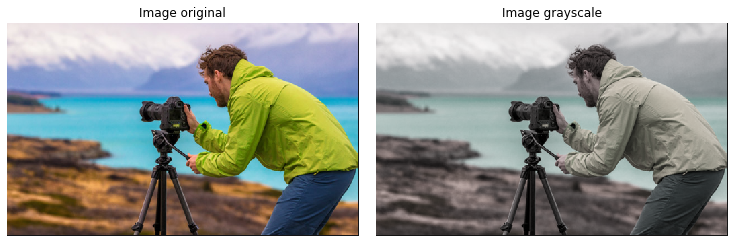

In [223]:
pic = Picture("capture.png")
image = ImageProcessing(pic)
#transformer l'image en grayscale et afficher l'image et sa transformée
image.transformGrayscaleGlouton()

## Changer l'échelle d'une image en inversant la hauteur et la largeur en gardant les mêmes proportions

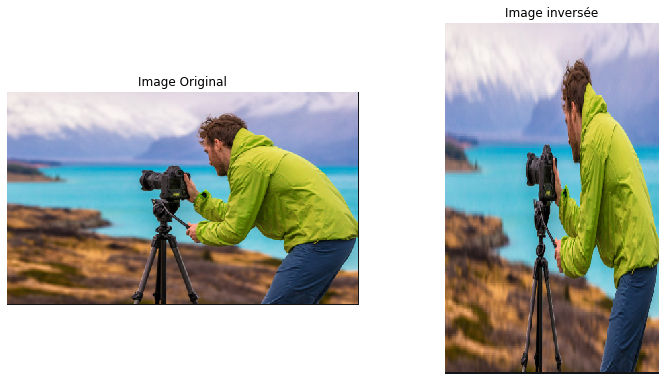

In [224]:
#Inverser les proportions de l'image et afficher l'image et sa transformée
image.transformScale()

## Separation de couleurs

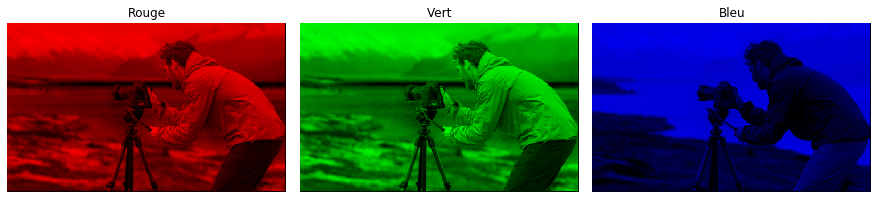

In [225]:
#Séparer les couleurs de l'image et afficher les trois images
image.separerCouleur()

## Glass Filter

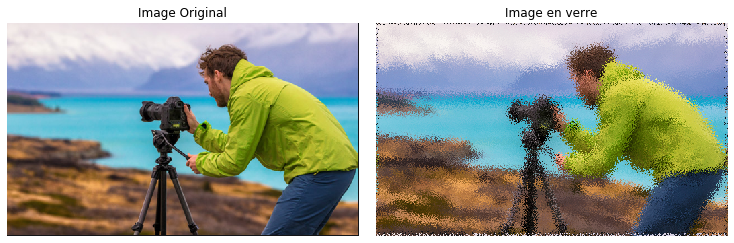

In [226]:
#Mettre l'image en filtre verre et afficher l'image et sa transformée
image.filtreGlass()